In [1]:
install.packages("ggplot2")
install.packages("dplyr")


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'

also installing the dependency 'rlang'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
rlang 0.4.11  1.0.2              TRUE
dplyr  1.0.6  1.0.8              TRUE

  Binaries will be installed
package 'rlang' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Memento\AppData\Local\Temp\RtmpkDEdNm\downloaded_packages


In [2]:
library(ggplot2)
library(dplyr)
options(repr.plot.height=4,repr.plot.width=6)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Cargar los datos en un dataframe llamado: airbnb

In [3]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [4]:
airbnb[1:6,]

Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [5]:
colnames(airbnb)<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")


In [6]:
head(airbnb)

CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [7]:
airbnb <- cbind(airbnb, MetrosCuadrados = c(airbnb$PiesCuadrados*0.092903))
airbnb

CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
28004,Universidad,House,Private room,7,5,1,7,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking allowed,Heating,Fire extinguisher,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,77,NA
28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no comiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 junto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [8]:
unique(airbnb$CodigoPostal)

[1] 28004        28015        28013        28005        28012       
 [6] 28014        28045        27013                     28007       
[11] 28028        28009        28001        28006        28010       
[16] 28002        28034        28050        28008        28011       
[21] 28049        28038        28053        28047        28025       
[26] 28019        28024        28016        28036        28046       
[31] 28039        28020        28003        28029        28054       
[36] 28041        28026        28058        28018        28030       
[41] 28017        28027        28043        28033        28055       
[46] 28021        28032        28037        28022        28042       
[51] 28094        280013       28002\n28002 28035        28040       
[56] 28031        28044        28105        28023        2805        
[61] 28051        Madrid 28004 20126        28051\n28051 28850       
[66] 28048        28056        20013        27004        28060       
[71] -            28           2815         25008        2015        
[76] 28052        2804        
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

In [9]:
airbnb[which (airbnb$CodigoPostal == '-'),'CodigoPostal'] <- NA
airbnb[which (airbnb$CodigoPostal == '28'),'CodigoPostal'] <- NA
airbnb[which (airbnb$CodigoPostal == '20126'),'CodigoPostal'] <- NA
airbnb[which (airbnb$CodigoPostal == '20013'),'CodigoPostal'] <- NA
airbnb[which (airbnb$CodigoPostal == '27004'),'CodigoPostal'] <- NA
airbnb[which (airbnb$CodigoPostal == '25008'),'CodigoPostal'] <- NA
airbnb[which (airbnb$CodigoPostal == '280013'),'CodigoPostal'] <- '28013'
airbnb[which (airbnb$CodigoPostal == '27013'),'CodigoPostal'] <- '28013'
airbnb[which (airbnb$CodigoPostal == '2804'),'CodigoPostal'] <- '28004'
airbnb[which (airbnb$CodigoPostal == '2805'),'CodigoPostal'] <- '28005'
airbnb[which (airbnb$CodigoPostal == '2815'),'CodigoPostal'] <- '28015'
airbnb[which (airbnb$CodigoPostal == '28002\n28002'),'CodigoPostal'] <- '28002'
airbnb[which (airbnb$CodigoPostal == 'Madrid 28004'),'CodigoPostal'] <- '28004'
airbnb[which (airbnb$CodigoPostal == '28051\n28051'),'CodigoPostal'] <- '28051'
airbnb[which (airbnb$CodigoPostal == '2015'),'CodigoPostal'] <- '28015'

In [10]:
airbnb$CodigoPostal <- droplevels(airbnb$CodigoPostal)

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos?

In [11]:
unique(airbnb$CodigoPostal)

[1] 28004 28015 28013 28005 28012 28014 28045       28007 28028 28009 28001
[13] 28006 28010 28002 28034 28050 28008 28011 28049 28038 28053 28047 28025
[25] 28019 28024 28016 28036 28046 28039 28020 28003 28029 28054 28041 28026
[37] 28058 28018 28030 28017 28027 28043 28033 28055 28021 28032 28037 28022
[49] 28042 28094 28035 28040 28031 28044 28105 28023 28051 <NA>  28850 28048
[61] 28056 28060 28052
62 Levels:  28001 28002 28003 28004 28005 28006 28007 28008 28009 ... 28850

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [12]:
print('Los cinco C.P. con más entradas son:') 

head(sort(summary(airbnb$CodigoPostal),decreasing=TRUE),n=5)

print('Los cinco C.P. con menos entradas son:') 

head(sort(summary(airbnb$CodigoPostal),decreasing=F),n=5, na.omit=T)

[1] "Los cinco C.P. con más entradas son:"


28012 28004 28005 28013 28014 
 2060  1796  1195  1021   630

[1] "Los cinco C.P. con menos entradas son:"


28048 28052 28056 28058 28060 
    1     1     1     1     1

¿Cuales son los barrios que hay en el código postal 28012?

In [13]:
unique(airbnb$Barrio[airbnb$CodigoPostal=='28012'])

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     <NA>           
 [9] Delicias        Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... ZofÃ­o

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [71]:
paste('El número de entradas que aparecen son de:', length(airbnb$Barrio[airbnb$CodigoPostal=='28012']))

summary(airbnb$Barrio[airbnb$CodigoPostal=='28012'])


[1] "El número de entradas que aparecen son de: 2066"

Embajadores                            Sol 
                          1449                            301 
                        Cortes                Palos de Moguer 
                           216                             46 
                       Palacio                        Acacias 
                            27                             13 
                   Universidad                       Arapiles 
                             4                              1 
                        Atocha                       Delicias 
                             1                              1 
                          Goya                       Abrantes 
                             1                              0 
                       Adelfas                     Aeropuerto 
                             0                              0 
                       Aguilas               Alameda de Osuna 
                             0                              0 
                       Almagro                       Almenara 
                             0                              0 
                   Almendrales                         Aluche 
                             0                              0 
                        Ambroz                        Amposta 
                             0                              0 
              Apostol Santiago                        Aravaca 
                             0                              0 
                         Arcos                     ArgÃ¼elles 
                             0                              0 
                 Bellas Vistas                     Berruguete 
                             0                              0 
                    Buenavista                       Butarque 
                             0                              0 
                     CÃ¡rmenes                     Campamento 
                             0                              0 
                      Canillas                     Canillejas 
                             0                              0 
                 Casa de Campo    Casco HistÃ³rico de Barajas 
                             0                              0 
  Casco HistÃ³rico de Vallecas Casco HistÃ³rico de VicÃ¡lvaro 
                             0                              0 
                    Castellana                       Castilla 
                             0                              0 
                   Castillejos                        Chopera 
                             0                              0 
                Ciudad JardÃ­n           Ciudad Universitaria 
                             0                              0 
                        Colina                       Comillas 
                             0                              0 
                   ConcepciÃ³n                     Corralejos 
                             0                              0 
                   Costillares                 Cuatro Caminos 
                             0                              0 
                Cuatro Vientos                      El Goloso 
                             0                              0 
                   El PlantÃ­o                        El Viso 
                             0                              0 
                    EntrevÃ­as                       Estrella 
                             0                              0 
                    FontarrÃ³n               Fuente del Berro 
                             0                              0 
                 Fuentelareina                     Gaztambide 
                             0                              0 
                    Guindalera                        HellÃ­n 
                             0                              0 
               HispanoamÃ©rica                          Ibiza 
                             0                    

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [15]:
paste('El número de barrios es de:', length(unique(airbnb$Barrio)))

unique(airbnb$Barrio)

[1] "El número de barrios es de: 125"

[1] Universidad                    Sol                           
  [3] Imperial                       Acacias                       
  [5] Chopera                        Delicias                      
  [7] Palos de Moguer                Embajadores                   
  [9] Cortes                         Atocha                        
 [11] PacÃ­fico                      Adelfas                       
 [13] Estrella                       Ibiza                         
 [15] JerÃ³nimos                     NiÃ±o JesÃºs                  
 [17] Palacio                        Justicia                      
 [19] Recoletos                      Goya                          
 [21] Fuente del Berro               Arapiles                      
 [23] Trafalgar                      Almagro                       
 [25] Guindalera                     Lista                         
 [27] Castellana                     El Viso                       
 [29] Prosperidad                    Valverde                      
 [31] Casa de Campo                  El Goloso                     
 [33] Numancia                       CÃ¡rmenes                     
 [35] Puerta del Angel               Lucero                        
 [37] Aluche                         San Isidro                    
 [39] Campamento                     Comillas                      
 [41] OpaÃ±el                        Vista Alegre                  
 [43] Ciudad JardÃ­n                 HispanoamÃ©rica               
 [45] Nueva EspaÃ±a                  Castilla                      
 [47] Bellas Vistas                  Cuatro Caminos                
 [49] Castillejos                    Vallehermoso                  
 [51] Almenara                       Valdeacederas                 
 [53] Berruguete                     Gaztambide                    
 [55] Rios Rosas                     PeÃ±agrande                   
 [57] ArgÃ¼elles                     Puerta Bonita                 
 [59] Buenavista                     Abrantes                      
 [61] Orcasur                        San FermÃ­n                   
 [63] Almendrales                    Pradolongo                    
 [65] Portazgo                       EntrevÃ­as                    
 [67] San Diego                      Palomeras Bajas               
 [69] FontarrÃ³n                     Vinateros                     
 [71] Ventas                         Pueblo Nuevo                  
 [73] Quintana                       ConcepciÃ³n                   
 [75] San Juan Bautista              Costillares                   
 [77] Piovera                        Canillas                      
 [79] Pinar del Rey                  Apostol Santiago              
 [81] San AndrÃ©s                    Valdefuentes                  
 [83] Butarque                       Los Angeles                   
 [85] Casco HistÃ³rico de VicÃ¡lvaro Simancas                      
 [87] Rejas                          Salvador                      
 [89] Casco HistÃ³rico de Barajas    Pilar                         
 [91] La Paz                         Mirasierra                    
 [93] Ciudad Universitaria           MoscardÃ³                     
 [95] Palomeras Sureste              Marroquina                    
 [97] Media Legua                    Los Rosales                   
 [99] Casco HistÃ³rico de Vallecas   TimÃ³n                        
[101] Corralejos                     Cuatro Vientos                
[103] Colina                         San Cristobal                 
[105] Alameda de Osuna               Aeropuerto                    
[107] Palomas                        ZofÃ­o                        
[109] Aguilas                        Legazpi                       
[111] Fuentelareina                  Aravaca                       
[113] Ambroz                         Canillejas                    
[115] Valdezarza                     Amposta                       
[117] San Pascual                    Santa Eugenia        

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [16]:
head(sort(summary(airbnb$Barrio),decreasing=TRUE),n=5)

Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [17]:
length(unique(airbnb$TipoAlquiler))

unique(airbnb$TipoAlquiler)

table(airbnb$TipoAlquiler)

[1] 3

[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
"Removed 9 rows containing non-finite values (stat_boxplot)."

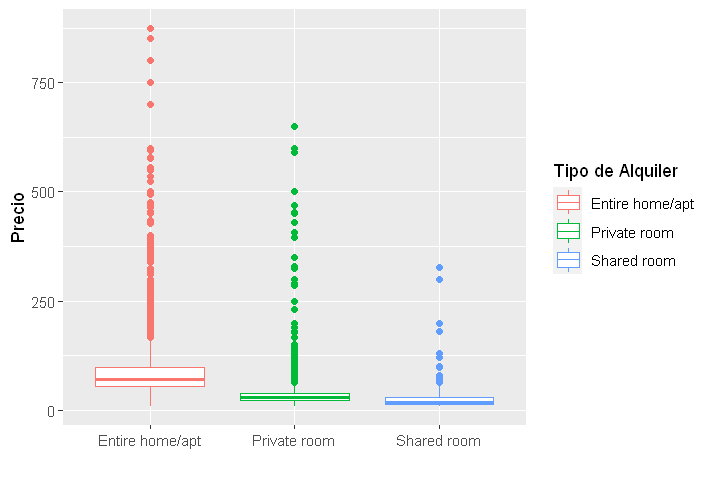

In [18]:
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+geom_boxplot()+
scale_color_discrete(name="Tipo de Alquiler")+ylab('Precio')+xlab('')

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [29]:
barrio_query <- aggregate(airbnb$Precio, list(airbnb$Barrio), FUN=mean)
colnames(barrio_query) <- c('Barrio', 'Precio medio')
head(barrio_query)


#¿es estadísticamente significativa? ¿Con que test lo comprobarías?

Barrio,Precio medio
Abrantes,28.16667
Acacias,45.71724
Adelfas,57.19608
Aeropuerto,32.16667
Aguilas,24.73333
Alameda de Osuna,49.54167


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [20]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler=='Entire home/apt',]
airbnb_entire

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
9,28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
10,28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA
11,28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",40,70,90,3.71612
15,28013,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials,Hangers,Hair dryer,Iron",646,75,91,60.01534


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [21]:
head(sort(summary(airbnb_entire$Barrio),decreasing=TRUE),n=5)

Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [69]:
entire_query <- aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=TRUE)
colnames(entire_query) <- c('Barrio', 'PrecioMedio')
entire_query

#No consigo el código que permite sacar los 5 barrios que tienen un mayor precio y los siguientes ejercicios depende de ello.
#He intentado utilizar el código de arriba y no funciona de la misma manera...

Barrio,PrecioMedio
Abrantes,46.00000
Acacias,68.16393
Adelfas,68.72727
Aeropuerto,38.00000
Aguilas,54.50000
Alameda de Osuna,138.75000
Almagro,109.18557
Almenara,65.68000
Almendrales,77.50000
Aluche,55.88889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [74]:
paste('El número total de apartamentos es de:', length(airbnb_entire$Barrio[airbnb_entire$TipoPropiedad=='Apartment']))

summary(airbnb_entire$Barrio[airbnb_entire$TipoPropiedad=='Apartment'])


[1] "El número total de apartamentos es de: 6995"

Embajadores                    Universidad 
                          1099                            897 
                       Palacio                            Sol 
                           684                            648 
                        Cortes                       Justicia 
                           528                            486 
                     Trafalgar                     ArgÃ¼elles 
                           203                            128 
                          Goya                      Recoletos 
                           122                            122 
               Palos de Moguer                       Arapiles 
                           115                             92 
                       Almagro                     Guindalera 
                            87                             73 
                Cuatro Caminos                     Castellana 
                            67                             66 
              Puerta del Angel                          Ibiza 
                            65                             60 
                         Lista                        Acacias 
                            60                             56 
                    Gaztambide                     JerÃ³nimos 
                            55                             55 
                    Rios Rosas                      PacÃ­fico 
                            52                             51 
                      Delicias                HispanoamÃ©rica 
                            46                             44 
                   Prosperidad                    Castillejos 
                            42                             38 
                      Imperial                  Bellas Vistas 
                            38                             37 
                 Casa de Campo                  Nueva EspaÃ±a 
                            36                             36 
                  Vallehermoso               Fuente del Berro 
                            33                             30 
                      Numancia                        Chopera 
                            29                             28 
                       Adelfas                     Berruguete 
                            27                             27 
                    San Isidro                 Ciudad JardÃ­n 
                            27                             26 
                     San Diego                         Ventas 
                            24                             24 
                      Almenara                        El Viso 
                            22                             21 
                      Castilla                   Vista Alegre 
                            20                             20 
                 Valdeacederas                       Comillas 
                            19                             18 
                  Valdefuentes                    ConcepciÃ³n 
                            16                             14 
                     MoscardÃ³                   NiÃ±o JesÃºs 
                            13                             13 
                   Almendrales   Casco HistÃ³rico de Vallecas 
                            12                             12 
                       Legazpi                   Pueblo Nuevo 
                            12                             12 
                      Quintana                       Valverde 
                            12                             12 
                        Lucero                  Puerta Bonita 
                            11                             11 
             San Juan Bautista                       Canillas 
                            11                             10 
                   Media Legua                       Simancas 
                            10                    

In [75]:
table(airbnb_entire)

ERROR: Error in table(airbnb_entire): attempt to make a table with >= 2^31 elements


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?